In [1]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123425 sha256=fc570ec178f49c9f0c6893ee76cdcb1a8e10e0418126fcbb9613c9cafb159a9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-_chado_4/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [33]:
T = [0, 100]
nb_node = 10
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15

p_link = numpy.sqrt(nb_node)/nb_node

In [34]:
S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  10
Nb of segmented nodes :  15.0
Nb of links :  19
Nb of segmented links :  26.0
Nb of event times :  57


<AxesSubplot:xlabel='t', ylabel='Nodes'>

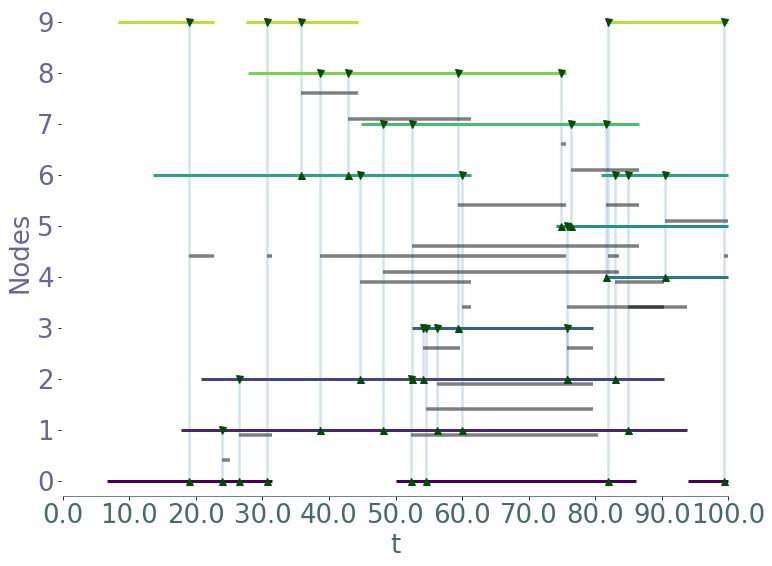

In [35]:
S.plot()

In [36]:
bt.to_undirected(S)

In [37]:
SS = S.stream_graph_to_link_stream()

In [38]:
SS.write_to_matthieu_link_stream("any")

In [39]:
betweenness, general_contri, nouveau, events, features = bt.betweenness_all(SS)

0
********** (44.366589142806795, 44.6890894123902) **************
[(6, 44.366589142806795), (6, 42.80254801228882), (6, 38.63106480839467), (6, 35.86844093553039), (8, 44.366589142806795), (8, 42.80254801228882), (6, 44.6890894123902), (8, 44.6890894123902), (1, 44.6890894123902)]
///////////////////////
(1, 44.6890894123902) {} {(1, 44.6890894123902)}
(8, 44.6890894123902) {} {(8, 44.6890894123902)}
(1, 44.6890894123902) {} {(8, 44.6890894123902)}
(6, 44.6890894123902) {} {(6, 44.6890894123902)}
(8, 44.6890894123902) {} {(6, 44.6890894123902)}
(8, 42.80254801228882) {} {(8, 42.80254801228882)}
(1, 44.6890894123902) {} {(8, 42.80254801228882)}
(8, 44.366589142806795) {} {(8, 44.366589142806795)}
(1, 44.6890894123902) {} {(8, 44.366589142806795)}
(6, 35.86844093553039) {} {(6, 35.86844093553039)}
(8, 44.6890894123902) {} {(6, 35.86844093553039)}
(6, 38.63106480839467) {} {(6, 38.63106480839467)}
(8, 44.6890894123902) {} {(6, 38.63106480839467)}
(6, 42.80254801228882) {} {(6, 42.8025480

edge after 74.82282625952246 75.61304700994472
t1p,t2p 61.35534226382198 74.82282625952246
0 3 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 61.35534226382198 74.82282625952246
3 1 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 61.35534226382198 74.82282625952246
3 8 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 61.35534226382198 74.82282625952246
8 5 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 74.82282625952246 74.82282625952246
8 5 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 74.82282625952246 74

1 0 23.863822474044515 -1 -1 -1 -1
edge after 23.863822474044515 25.160559466610902
t1p,t2p 23.863822474044515 23.863822474044515
1 0 25.160559466610902 -1 -1 -1 -1
t1p,t2p 23.863822474044515 25.160559466610902
0 2 25.160559466610902 23.863822474044515 25.160559466610902 -2 -1
edge after 26.42284836674213 30.727350161612218
t1p,t2p 26.42284836674213 26.42284836674213
0 2 25.160559466610902 23.863822474044515 25.160559466610902 -2 -1
edge after 30.727350161612218 31.370672546862984
t1p,t2p 26.42284836674213 30.727350161612218
0 2 25.160559466610902 23.863822474044515 25.160559466610902 -2 -1
t1p,t2p 30.727350161612218 31.370672546862984
0 9 25.160559466610902 23.863822474044515 25.160559466610902 -2 -1
edge after 30.727350161612218 31.370672546862984
t1p,t2p 30.727350161612218 30.727350161612218
0 9 25.160559466610902 23.863822474044515 25.160559466610902 -2 -1
t1p,t2p 30.727350161612218 31.370672546862984
1 3 56.28480941635639 -1 -1 -1 -1
edge after 56.28480941635639 59.34925517493079


6 2 44.6890894123902 44.366589142806795 44.6890894123902 44.6890894123902 48.193417313173406
edge after 44.6890894123902 48.193417313173406
t1p,t2p 44.6890894123902 44.6890894123902
2
********** (30.727350161612218, 31.370672546862984) **************
[(0, 31.370672546862984), (9, 31.370672546862984)]
///////////////////////
(9, 31.370672546862984) {} {(9, 31.370672546862984)}
(0, 31.370672546862984) {} {(0, 31.370672546862984)}
(9, 31.370672546862984) {} {(0, 31.370672546862984)}
********** (38.63106480839467, 42.80254801228882) **************
[(9, 31.370672546862984), (6, 42.80254801228882), (8, 42.80254801228882), (1, 42.80254801228882)]
///////////////////////
(1, 42.80254801228882) {} {(1, 42.80254801228882)}
(8, 42.80254801228882) {} {(8, 42.80254801228882)}
(1, 42.80254801228882) {} {(8, 42.80254801228882)}
(6, 42.80254801228882) {} {(6, 42.80254801228882)}
(9, 31.370672546862984) {} {(9, 31.370672546862984)}
(6, 42.80254801228882) {} {(9, 31.370672546862984)}
********** (42.8025

t1p,t2p 74.82282625952246 74.82282625952246
8 5 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 74.82282625952246 74.82282625952246
1 8 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 61.35534226382198 74.82282625952246
8 5 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 74.82282625952246 74.82282625952246
8 5 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 74.82282625952246 74.82282625952246
7 1 74.82282625952246 61.35534226382198 74.82282625952246 74.82282625952246 75.61304700994472
edge after 74.82282625952246 75.61304700994472
t1p,t2p 61.35534226382198 74.82282625952246
1 8 74.82282625952246 61.355342

t1p,t2p 56.28480941635639 59.34925517493079
1 7 59.34925517493079 56.28480941635639 59.34925517493079 59.34925517493079 59.629901380901956
edge after 59.34925517493079 59.629901380901956
t1p,t2p 56.28480941635639 59.34925517493079
3 2 59.34925517493079 56.28480941635639 59.34925517493079 59.34925517493079 59.629901380901956
edge after 59.34925517493079 59.629901380901956
t1p,t2p 56.28480941635639 59.34925517493079
2 6 59.34925517493079 56.28480941635639 59.34925517493079 59.34925517493079 59.629901380901956
edge after 59.34925517493079 59.629901380901956
t1p,t2p 56.28480941635639 59.34925517493079
2 7 59.34925517493079 56.28480941635639 59.34925517493079 59.34925517493079 59.629901380901956
edge after 59.34925517493079 59.629901380901956
t1p,t2p 56.28480941635639 59.34925517493079
2 6 59.34925517493079 56.28480941635639 59.34925517493079 59.34925517493079 59.629901380901956
edge after 59.34925517493079 59.629901380901956
t1p,t2p 56.28480941635639 59.34925517493079
2 7 59.34925517493079

edge after 83.62919116685474 84.87161137882042
t1p,t2p 83.50541974915897 83.62919116685474
7 1 83.62919116685474 83.50541974915897 83.62919116685474 83.62919116685474 84.87161137882042
t1p,t2p 83.50541974915897 83.62919116685474
7 2 83.62919116685474 83.50541974915897 83.62919116685474 83.62919116685474 84.87161137882042
edge after 83.62919116685474 84.87161137882042
t1p,t2p 83.50541974915897 83.62919116685474
2 6 83.62919116685474 83.50541974915897 83.62919116685474 83.62919116685474 84.87161137882042
edge after 83.62919116685474 84.87161137882042
t1p,t2p 83.50541974915897 83.62919116685474
2 6 83.62919116685474 83.50541974915897 83.62919116685474 83.62919116685474 84.87161137882042
edge after 83.62919116685474 84.87161137882042
t1p,t2p 83.50541974915897 83.62919116685474
7 5 83.62919116685474 83.50541974915897 83.62919116685474 83.62919116685474 84.87161137882042
edge after 83.62919116685474 84.87161137882042
t1p,t2p 83.50541974915897 83.62919116685474
4 7 84.87161137882042 -1 -1 -1 

********** (59.629901380901956, 59.94215142732125) **************
[(8, 59.94215142732125), (2, 59.94215142732125), (0, 59.94215142732125), (1, 59.94215142732125), (7, 59.94215142732125), (3, 59.94215142732125)]
///////////////////////
(3, 59.94215142732125) {} {(3, 59.94215142732125)}
(7, 59.94215142732125) {} {(7, 59.94215142732125)}
(1, 59.94215142732125) {} {(1, 59.94215142732125)}
(7, 59.94215142732125) {} {(1, 59.94215142732125)}
(3, 59.94215142732125) {} {(1, 59.94215142732125)}
(0, 59.94215142732125) {} {(0, 59.94215142732125)}
(2, 59.94215142732125) {} {(2, 59.94215142732125)}
(0, 59.94215142732125) {} {(2, 59.94215142732125)}
(7, 59.94215142732125) {} {(2, 59.94215142732125)}
(8, 59.94215142732125) {} {(8, 59.94215142732125)}
(3, 59.94215142732125) {} {(8, 59.94215142732125)}
********** (59.94215142732125, 61.35534226382198) **************
[(8, 61.35534226382198), (2, 61.35534226382198), (0, 61.35534226382198), (1, 61.35534226382198), (7, 61.35534226382198), (3, 61.35534226382

6 2 82.92690772790067 -1 -1 -1 -1
edge after 82.92690772790067 83.50541974915897
t1p,t2p 82.92690772790067 82.92690772790067
2 5 82.92690772790067 82.92690772790067 82.92690772790067 82.92690772790067 83.50541974915897
edge after 82.92690772790067 83.50541974915897
t1p,t2p 81.92135944064438 82.92690772790067
2 7 82.92690772790067 82.92690772790067 82.92690772790067 82.92690772790067 83.50541974915897
edge after 82.92690772790067 83.50541974915897
t1p,t2p 81.92135944064438 82.92690772790067
7 1 82.92690772790067 82.92690772790067 82.92690772790067 82.92690772790067 83.50541974915897
edge after 82.92690772790067 83.50541974915897
t1p,t2p 81.92135944064438 82.92690772790067
7 4 82.92690772790067 82.92690772790067 82.92690772790067 82.92690772790067 83.50541974915897
edge after 82.92690772790067 83.50541974915897
t1p,t2p 81.92135944064438 82.92690772790067
6 2 83.50541974915897 -1 -1 -1 -1
edge after 83.50541974915897 83.62919116685474
t1p,t2p 82.92690772790067 83.50541974915897
2 5 83.505

t1p,t2p 75.78026622745247 75.78026622745247
2 5 75.78026622745247 75.77929590398148 75.78026622745247 75.78026622745247 76.31767987524688
edge after 75.78026622745247 76.31767987524688
t1p,t2p 75.77929590398148 75.78026622745247
7 1 76.31767987524688 -1 -1 -1 -1
edge after 76.31767987524688 79.73349567329026
t1p,t2p 75.78026622745247 76.31767987524688
1 3 76.31767987524688 75.78026622745247 76.31767987524688 76.31767987524688 79.73349567329026
edge after 76.31767987524688 79.73349567329026
t1p,t2p 75.78026622745247 76.31767987524688
1 3 76.31767987524688 75.78026622745247 76.31767987524688 76.31767987524688 79.73349567329026
edge after 76.31767987524688 79.73349567329026
t1p,t2p 75.78026622745247 76.31767987524688
7 2 76.31767987524688 75.78026622745247 76.31767987524688 76.31767987524688 79.73349567329026
edge after 76.31767987524688 79.73349567329026
t1p,t2p 75.78026622745247 76.31767987524688
2 0 76.31767987524688 75.78026622745247 76.31767987524688 76.31767987524688 79.733495673290

(6, 83.50541974915897) {} {(2, 76.31767987524688)}
(2, 79.73349567329026) {} {(2, 79.73349567329026)}
(6, 83.50541974915897) {} {(2, 79.73349567329026)}
(2, 75.77929590398148) {} {(2, 75.77929590398148)}
(6, 83.50541974915897) {} {(2, 75.77929590398148)}
(2, 80.41206683462686) {} {(2, 80.41206683462686)}
(6, 83.50541974915897) {} {(2, 80.41206683462686)}
(2, 81.68006613089698) {} {(2, 81.68006613089698)}
(6, 83.50541974915897) {} {(2, 81.68006613089698)}
(2, 81.92135944064438) {} {(2, 81.92135944064438)}
(6, 83.50541974915897) {} {(2, 81.92135944064438)}
(2, 82.92690772790067) {} {(2, 82.92690772790067)}
(6, 83.50541974915897) {} {(2, 82.92690772790067)}
(2, 83.50541974915897) {} {(2, 83.50541974915897)}
(6, 83.50541974915897) {} {(2, 83.50541974915897)}
(5, 75.61304700994472) {} {(5, 75.61304700994472)}
(7, 83.50541974915897) {} {(5, 75.61304700994472)}
(2, 83.50541974915897) {} {(5, 75.61304700994472)}
********** (83.50541974915897, 83.62919116685474) **************
[(5, 75.613047009

********** (23.863822474044515, 25.160559466610902) **************
[(0, 22.67319976189898), (1, 25.160559466610902)]
///////////////////////
(1, 25.160559466610902) {} {(1, 25.160559466610902)}
(0, 22.67319976189898) {} {(0, 22.67319976189898)}
(1, 25.160559466610902) {} {(0, 22.67319976189898)}
********** (26.42284836674213, 30.727350161612218) **************
[(0, 30.727350161612218), (2, 30.727350161612218)]
///////////////////////
(2, 30.727350161612218) {} {(2, 30.727350161612218)}
(0, 30.727350161612218) {} {(0, 30.727350161612218)}
(2, 30.727350161612218) {} {(0, 30.727350161612218)}
********** (30.727350161612218, 31.370672546862984) **************
[(0, 31.370672546862984), (2, 31.370672546862984)]
///////////////////////
(2, 31.370672546862984) {} {(2, 31.370672546862984)}
(0, 31.370672546862984) {} {(0, 31.370672546862984)}
(2, 31.370672546862984) {} {(0, 31.370672546862984)}
********** (38.63106480839467, 42.80254801228882) **************
[(8, 42.80254801228882), (1, 42.80254

(7, 56.28480941635639) {} {(2, 56.28480941635639)}
(1, 56.28480941635639) {} {(1, 56.28480941635639)}
(8, 56.28480941635639) {} {(8, 56.28480941635639)}
(1, 56.28480941635639) {} {(8, 56.28480941635639)}
(6, 44.366589142806795) {} {(6, 44.366589142806795)}
(2, 56.28480941635639) {} {(6, 44.366589142806795)}
(8, 56.28480941635639) {} {(6, 44.366589142806795)}
(8, 44.366589142806795) {} {(8, 44.366589142806795)}
(1, 56.28480941635639) {} {(8, 44.366589142806795)}
(8, 44.6890894123902) {} {(8, 44.6890894123902)}
(1, 56.28480941635639) {} {(8, 44.6890894123902)}
(8, 48.193417313173406) {} {(8, 48.193417313173406)}
(1, 56.28480941635639) {} {(8, 48.193417313173406)}
(8, 52.399105148503374) {} {(8, 52.399105148503374)}
(1, 56.28480941635639) {} {(8, 52.399105148503374)}
(8, 52.49073257040008) {} {(8, 52.49073257040008)}
(1, 56.28480941635639) {} {(8, 52.49073257040008)}
(8, 54.07400826577283) {} {(8, 54.07400826577283)}
(1, 56.28480941635639) {} {(8, 54.07400826577283)}
(8, 54.52519781573363

In [40]:
bt.simulations(SS, "papier")

0
********** (44.366589142806795, 44.6890894123902) **************
[(6, 44.366589142806795), (6, 42.80254801228882), (6, 38.63106480839467), (6, 35.86844093553039), (8, 44.366589142806795), (8, 42.80254801228882), (6, 44.6890894123902), (8, 44.6890894123902), (1, 44.6890894123902)]
///////////////////////
(1, 44.6890894123902) {} {(1, 44.6890894123902)}
(8, 44.6890894123902) {} {(8, 44.6890894123902)}
(1, 44.6890894123902) {} {(8, 44.6890894123902)}
(6, 44.6890894123902) {} {(6, 44.6890894123902)}
(8, 44.6890894123902) {} {(6, 44.6890894123902)}
(8, 42.80254801228882) {} {(8, 42.80254801228882)}
(1, 44.6890894123902) {} {(8, 42.80254801228882)}
(8, 44.366589142806795) {} {(8, 44.366589142806795)}
(1, 44.6890894123902) {} {(8, 44.366589142806795)}
(6, 35.86844093553039) {} {(6, 35.86844093553039)}
(8, 44.6890894123902) {} {(6, 35.86844093553039)}
(6, 38.63106480839467) {} {(6, 38.63106480839467)}
(8, 44.6890894123902) {} {(6, 38.63106480839467)}
(6, 42.80254801228882) {} {(6, 42.8025480

2 7 75.61304700994472 74.82282625952246 75.61304700994472 75.61304700994472 75.77929590398148
edge after 75.61304700994472 75.77929590398148
t1p,t2p 74.82282625952246 75.61304700994472
2 7 75.61304700994472 74.82282625952246 75.61304700994472 75.61304700994472 75.77929590398148
edge after 75.61304700994472 75.77929590398148
t1p,t2p 74.82282625952246 75.61304700994472
0 3 75.61304700994472 74.82282625952246 75.61304700994472 75.61304700994472 75.77929590398148
edge after 75.61304700994472 75.77929590398148
t1p,t2p 74.82282625952246 75.61304700994472
3 1 75.61304700994472 74.82282625952246 75.61304700994472 75.61304700994472 75.77929590398148
edge after 75.61304700994472 75.77929590398148
t1p,t2p 74.82282625952246 75.61304700994472
3 8 75.61304700994472 74.82282625952246 75.61304700994472 75.61304700994472 75.77929590398148
t1p,t2p 74.82282625952246 75.61304700994472
8 5 75.61304700994472 74.82282625952246 75.61304700994472 75.61304700994472 75.77929590398148
t1p,t2p 74.82282625952246 75

edge after 75.78026622745247 76.31767987524688
t1p,t2p 75.77929590398148 75.78026622745247
2 5 75.78026622745247 75.77929590398148 75.78026622745247 75.78026622745247 76.31767987524688
edge after 75.78026622745247 76.31767987524688
t1p,t2p 75.77929590398148 75.78026622745247
7 2 75.78026622745247 75.77929590398148 75.78026622745247 75.78026622745247 76.31767987524688
edge after 75.78026622745247 76.31767987524688
t1p,t2p 75.77929590398148 75.78026622745247
2 5 75.78026622745247 75.77929590398148 75.78026622745247 75.78026622745247 76.31767987524688
edge after 75.78026622745247 76.31767987524688
t1p,t2p 75.77929590398148 75.78026622745247
2 5 75.78026622745247 75.77929590398148 75.78026622745247 75.78026622745247 76.31767987524688
edge after 75.78026622745247 76.31767987524688
t1p,t2p 75.77929590398148 75.78026622745247
1 3 76.31767987524688 -1 -1 -1 -1
edge after 76.31767987524688 79.73349567329026
t1p,t2p 75.78026622745247 76.31767987524688
3 0 76.31767987524688 75.78026622745247 76.3

2
********** (30.727350161612218, 31.370672546862984) **************
[(0, 31.370672546862984), (9, 31.370672546862984)]
///////////////////////
(9, 31.370672546862984) {} {(9, 31.370672546862984)}
(0, 31.370672546862984) {} {(0, 31.370672546862984)}
(9, 31.370672546862984) {} {(0, 31.370672546862984)}
********** (38.63106480839467, 42.80254801228882) **************
[(9, 31.370672546862984), (6, 42.80254801228882), (8, 42.80254801228882), (1, 42.80254801228882)]
///////////////////////
(1, 42.80254801228882) {} {(1, 42.80254801228882)}
(8, 42.80254801228882) {} {(8, 42.80254801228882)}
(1, 42.80254801228882) {} {(8, 42.80254801228882)}
(6, 42.80254801228882) {} {(6, 42.80254801228882)}
(9, 31.370672546862984) {} {(9, 31.370672546862984)}
(6, 42.80254801228882) {} {(9, 31.370672546862984)}
********** (42.80254801228882, 44.366589142806795) **************
[(9, 31.370672546862984), (6, 44.366589142806795), (6, 42.80254801228882), (6, 38.63106480839467), (6, 35.86844093553039), (8, 44.36658

7 1 79.73349567329026 76.31767987524688 79.73349567329026 79.73349567329026 80.41206683462686
edge after 79.73349567329026 80.41206683462686
t1p,t2p 76.31767987524688 79.73349567329026
7 1 79.73349567329026 76.31767987524688 79.73349567329026 79.73349567329026 80.41206683462686
edge after 79.73349567329026 80.41206683462686
t1p,t2p 76.31767987524688 79.73349567329026
2 0 80.41206683462686 -1 -1 -1 -1
t1p,t2p 79.73349567329026 80.41206683462686
0 9 80.41206683462686 79.73349567329026 80.41206683462686 -2 -1
edge after 81.92135944064438 82.92690772790067
t1p,t2p 81.92135944064438 81.92135944064438
0 9 80.41206683462686 79.73349567329026 80.41206683462686 -2 -1
edge after 82.92690772790067 83.50541974915897
t1p,t2p 81.92135944064438 82.92690772790067
0 9 80.41206683462686 79.73349567329026 80.41206683462686 -2 -1
t1p,t2p 82.92690772790067 83.50541974915897
0 9 80.41206683462686 79.73349567329026 80.41206683462686 -2 -1
edge after 99.28829648357686 100
t1p,t2p 99.28829648357686 99.28829648

2 6 54.52519781573363 54.52519781573363 54.52519781573363 54.52519781573363 56.28480941635639
edge after 54.52519781573363 56.28480941635639
t1p,t2p 54.07400826577283 54.52519781573363
6 8 54.52519781573363 54.52519781573363 54.52519781573363 54.52519781573363 56.28480941635639
edge after 54.52519781573363 56.28480941635639
t1p,t2p 54.07400826577283 54.52519781573363
2 7 54.52519781573363 54.52519781573363 54.52519781573363 54.52519781573363 56.28480941635639
edge after 54.52519781573363 56.28480941635639
t1p,t2p 54.07400826577283 54.52519781573363
7 1 54.52519781573363 54.52519781573363 54.52519781573363 54.52519781573363 56.28480941635639
edge after 54.52519781573363 56.28480941635639
t1p,t2p 54.07400826577283 54.52519781573363
3 0 56.28480941635639 -1 -1 -1 -1
edge after 56.28480941635639 59.34925517493079
t1p,t2p 54.52519781573363 56.28480941635639
3 1 56.28480941635639 54.52519781573363 56.28480941635639 56.28480941635639 59.34925517493079
edge after 56.28480941635639 59.349255174

2 6 84.87161137882042 83.62919116685474 84.87161137882042 84.87161137882042 86.55141945299945
edge after 84.87161137882042 86.55141945299945
t1p,t2p 83.62919116685474 84.87161137882042
6 1 84.87161137882042 83.62919116685474 84.87161137882042 84.87161137882042 86.55141945299945
edge after 84.87161137882042 86.55141945299945
t1p,t2p 84.87161137882042 84.87161137882042
6 1 84.87161137882042 83.62919116685474 84.87161137882042 84.87161137882042 86.55141945299945
edge after 84.87161137882042 86.55141945299945
t1p,t2p 84.87161137882042 84.87161137882042
7 5 84.87161137882042 83.62919116685474 84.87161137882042 84.87161137882042 86.55141945299945
edge after 84.87161137882042 86.55141945299945
t1p,t2p 83.62919116685474 84.87161137882042
4 7 86.55141945299945 -1 -1 -1 -1
t1p,t2p 84.87161137882042 86.55141945299945
7 2 86.55141945299945 84.87161137882042 86.55141945299945 -2 -1
t1p,t2p 84.87161137882042 86.55141945299945
2 6 86.55141945299945 84.87161137882042 86.55141945299945 -2 -1
edge after

(0, 76.31767987524688) {} {(2, 61.35534226382198)}
(7, 76.31767987524688) {} {(2, 61.35534226382198)}
(3, 76.31767987524688) {} {(2, 61.35534226382198)}
********** (76.31767987524688, 79.73349567329026) **************
[(2, 61.35534226382198), (5, 79.73349567329026), (0, 79.73349567329026), (1, 61.35534226382198), (7, 79.73349567329026), (3, 79.73349567329026)]
///////////////////////
(3, 79.73349567329026) {} {(3, 79.73349567329026)}
(7, 79.73349567329026) {} {(7, 79.73349567329026)}
(1, 61.35534226382198) {} {(1, 61.35534226382198)}
(7, 79.73349567329026) {} {(1, 61.35534226382198)}
(3, 79.73349567329026) {} {(1, 61.35534226382198)}
(0, 79.73349567329026) {} {(0, 79.73349567329026)}
(5, 79.73349567329026) {} {(5, 79.73349567329026)}
(2, 61.35534226382198) {} {(2, 61.35534226382198)}
(5, 79.73349567329026) {} {(2, 61.35534226382198)}
(7, 79.73349567329026) {} {(2, 61.35534226382198)}
(0, 79.73349567329026) {} {(2, 61.35534226382198)}
(3, 79.73349567329026) {} {(2, 61.35534226382198)}
*

7
********** (44.6890894123902, 48.193417313173406) **************
[(1, 48.193417313173406), (8, 48.193417313173406), (6, 48.193417313173406), (2, 48.193417313173406)]
///////////////////////
(2, 48.193417313173406) {} {(2, 48.193417313173406)}
(6, 48.193417313173406) {} {(6, 48.193417313173406)}
(2, 48.193417313173406) {} {(6, 48.193417313173406)}
(8, 48.193417313173406) {} {(8, 48.193417313173406)}
(6, 48.193417313173406) {} {(8, 48.193417313173406)}
(1, 48.193417313173406) {} {(1, 48.193417313173406)}
(8, 48.193417313173406) {} {(1, 48.193417313173406)}
********** (48.193417313173406, 52.399105148503374) **************
[(1, 52.399105148503374), (8, 52.399105148503374), (6, 52.399105148503374), (2, 52.399105148503374)]
///////////////////////
(2, 52.399105148503374) {} {(2, 52.399105148503374)}
(6, 52.399105148503374) {} {(6, 52.399105148503374)}
(2, 52.399105148503374) {} {(6, 52.399105148503374)}
(8, 52.399105148503374) {} {(8, 52.399105148503374)}
(6, 52.399105148503374) {} {(8, 5

7 1 59.94215142732125 -1 -1 -1 -1
edge after 59.94215142732125 61.35534226382198
t1p,t2p 59.629901380901956 59.94215142732125
1 3 59.94215142732125 59.629901380901956 59.94215142732125 59.94215142732125 61.35534226382198
edge after 59.94215142732125 61.35534226382198
t1p,t2p 59.629901380901956 59.94215142732125
1 6 59.94215142732125 59.629901380901956 59.94215142732125 59.94215142732125 61.35534226382198
edge after 59.94215142732125 61.35534226382198
t1p,t2p 59.94215142732125 59.94215142732125
1 8 59.94215142732125 59.629901380901956 59.94215142732125 59.94215142732125 61.35534226382198
edge after 59.94215142732125 61.35534226382198
t1p,t2p 59.629901380901956 59.94215142732125
1 3 59.94215142732125 59.629901380901956 59.94215142732125 59.94215142732125 61.35534226382198
edge after 59.94215142732125 61.35534226382198
t1p,t2p 59.629901380901956 59.94215142732125
1 6 59.94215142732125 59.629901380901956 59.94215142732125 59.94215142732125 61.35534226382198
edge after 59.94215142732125 61.

(4, 84.87161137882042) {} {(7, 79.73349567329026)}
(7, 80.41206683462686) {} {(7, 80.41206683462686)}
(4, 84.87161137882042) {} {(7, 80.41206683462686)}
(7, 81.68006613089698) {} {(7, 81.68006613089698)}
(4, 84.87161137882042) {} {(7, 81.68006613089698)}
(7, 81.92135944064438) {} {(7, 81.92135944064438)}
(4, 84.87161137882042) {} {(7, 81.92135944064438)}
(7, 82.92690772790067) {} {(7, 82.92690772790067)}
(4, 84.87161137882042) {} {(7, 82.92690772790067)}
(7, 83.50541974915897) {} {(7, 83.50541974915897)}
(4, 84.87161137882042) {} {(7, 83.50541974915897)}
(7, 83.62919116685474) {} {(7, 83.62919116685474)}
(4, 84.87161137882042) {} {(7, 83.62919116685474)}
(2, 84.87161137882042) {} {(2, 84.87161137882042)}
(7, 84.87161137882042) {} {(7, 84.87161137882042)}
(4, 84.87161137882042) {} {(7, 84.87161137882042)}
(5, 75.61304700994472) {} {(5, 75.61304700994472)}
(7, 84.87161137882042) {} {(5, 75.61304700994472)}
(2, 84.87161137882042) {} {(5, 75.61304700994472)}
********** (75.61304700994472, 

********** (23.863822474044515, 25.160559466610902) **************
[(0, 22.67319976189898), (1, 25.160559466610902)]
///////////////////////
(1, 25.160559466610902) {} {(1, 25.160559466610902)}
(0, 22.67319976189898) {} {(0, 22.67319976189898)}
(1, 25.160559466610902) {} {(0, 22.67319976189898)}
********** (26.42284836674213, 30.727350161612218) **************
[(0, 30.727350161612218), (2, 30.727350161612218)]
///////////////////////
(2, 30.727350161612218) {} {(2, 30.727350161612218)}
(0, 30.727350161612218) {} {(0, 30.727350161612218)}
(2, 30.727350161612218) {} {(0, 30.727350161612218)}
********** (30.727350161612218, 31.370672546862984) **************
[(0, 31.370672546862984), (2, 31.370672546862984)]
///////////////////////
(2, 31.370672546862984) {} {(2, 31.370672546862984)}
(0, 31.370672546862984) {} {(0, 31.370672546862984)}
(2, 31.370672546862984) {} {(0, 31.370672546862984)}
********** (38.63106480839467, 42.80254801228882) **************
[(8, 42.80254801228882), (1, 42.80254

(7, 80.41206683462686) {} {(7, 80.41206683462686)}
(1, 59.94215142732125) {} {(1, 59.94215142732125)}
(7, 80.41206683462686) {} {(1, 59.94215142732125)}
(1, 61.35534226382198) {} {(1, 61.35534226382198)}
(7, 80.41206683462686) {} {(1, 61.35534226382198)}
(0, 80.41206683462686) {} {(0, 80.41206683462686)}
(5, 80.41206683462686) {} {(5, 80.41206683462686)}
(2, 44.6890894123902) {} {(2, 44.6890894123902)}
(5, 80.41206683462686) {} {(2, 44.6890894123902)}
(0, 80.41206683462686) {} {(2, 44.6890894123902)}
(7, 80.41206683462686) {} {(2, 44.6890894123902)}
(2, 48.193417313173406) {} {(2, 48.193417313173406)}
(5, 80.41206683462686) {} {(2, 48.193417313173406)}
(0, 80.41206683462686) {} {(2, 48.193417313173406)}
(7, 80.41206683462686) {} {(2, 48.193417313173406)}
(2, 52.399105148503374) {} {(2, 52.399105148503374)}
(5, 80.41206683462686) {} {(2, 52.399105148503374)}
(0, 80.41206683462686) {} {(2, 52.399105148503374)}
(7, 80.41206683462686) {} {(2, 52.399105148503374)}
(2, 52.49073257040008) {} 

In [41]:
bet_moi = bt.read_dictionary("papier_betweenness.pic")

In [42]:
import os
cmd = 'mv any_mat.ls archive_code/Test'
os.system(cmd)

0

In [43]:
import os
cmd = 'python2 archive_code/betweenness_all.py Test/any_mat.ls -1 res'
os.system(cmd)

0

In [44]:
bet_mat = bt.read_dictionary("res_betweenness.pic")

In [45]:
bet_mat.keys()

dict_keys(['1', '0', '3', '2', '5', '4', '7', '6', '9', '8'])

In [46]:
bet_moi.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [47]:
for v in bet_moi.keys():
    for t in bet_moi[v].keys():
        if (v.lower() in bet_mat ):
            if not (abs(bet_moi[v][t] - bet_mat[v.lower()][t]) < 1/100):
                print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])

erreur  2 80.41206683462686 =>    6834.6710519837825 6849.550996446151
erreur  2 81.68006613089698 =>    812.5259843297073 855.2110584260217
erreur  2 81.92135944064438 =>    812.5259843297073 860.5022220544763
erreur  5 75.61304700994472 =>    741.2139176992908 749.0292781668677
erreur  5 75.77929590398148 =>    741.2139176992908 749.0292781668677
erreur  5 75.78026622745247 =>    741.1926401086981 749.0080005762751
erreur  5 76.31767987524688 =>    729.4080467040089 737.2234071715859
erreur  5 79.73349567329026 =>    277.2162754389581 285.03163590653514
erreur  5 80.41206683462686 =>    1521.1112101636372 1527.7505747365356
erreur  5 81.68006613089698 =>    26.194469040832413 27.341176244863483
erreur  8 75.61304700994472 =>    2062.9182659772937 2070.733626444871


In [82]:
#contribution check
node = 8

In [83]:
import os
cmd = 'python2 archive_code/betweenness_tout.py Test/any_mat.ls -1 ' + S.node_to_label[node].lower() + " cont"
os.system(cmd)

0

In [84]:
cont_mat = bt.read_dictionary("cont_contri.pic")

In [85]:
for v in general_contri[node].keys():
    for t in general_contri[node][v].keys():
        if S.node_to_label[v].lower() in cont_mat:
            if abs(general_contri[node][v][t].val - cont_mat[S.node_to_label[v].lower()][t]) > 1/100:
                print("erreur ",v,t,"=>   ", "(",general_contri[node][v][t].dim,general_contri[node][v][t].val,")" ,cont_mat[S.node_to_label[v].lower()][t])

erreur  8 75.61304700994472 =>    ( 0 2062.9182659772937 ) 2070.733626444871
erreur  2 80.41206683462686 =>    ( 0 173.39685837772427 ) 188.27680284009247
erreur  2 81.68006613089698 =>    ( 0 173.39685837772427 ) 216.08193247403864
erreur  2 81.92135944064438 =>    ( 0 173.39685837772427 ) 221.37309610249326
erreur  5 81.68006613089698 =>    ( 0 26.194469040832413 ) 27.341176244863483
erreur  5 80.41206683462686 =>    ( 0 188.56181397995277 ) 195.2011785528512
erreur  5 79.73349567329026 =>    ( 0 277.2162754389581 ) 285.03163590653514
erreur  5 76.31767987524688 =>    ( 0 729.4080467040089 ) 737.2234071715859
erreur  5 75.78026622745247 =>    ( 0 741.1926401086981 ) 749.0080005762751
erreur  5 75.77929590398148 =>    ( 0 741.2139176992908 ) 749.0292781668677
erreur  5 75.61304700994472 =>    ( 0 741.2139176992908 ) 749.0292781668677


In [108]:
cont_mat['b']

KeyError: 'b'

In [117]:
general_contri[0]

{0: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 1: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 2: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 3: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 4: {1.1308940848602123: vol(0,0),
  70.7585

In [86]:
SS.write_to_sg("examples/erdos5")

In [126]:
SS.alpha

1.1308940848602123

In [127]:
SS.omega

100